In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#a) Random Sample of 25 and Glucose Analysis

In [7]:
# Set seed and take random sample
np.random.seed(42)
sample = df.sample(n=25)
sample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [9]:
# Calculate statistics
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()
sample_mean = sample['Glucose'].mean()
sample_mean

np.float64(116.64)

In [10]:
sample_max = sample['Glucose'].max()
sample_max

183

<ipython-input-11-9ca6d09eb1c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Population Mean', 'Sample Mean', 'Population Max', 'Sample Max'],


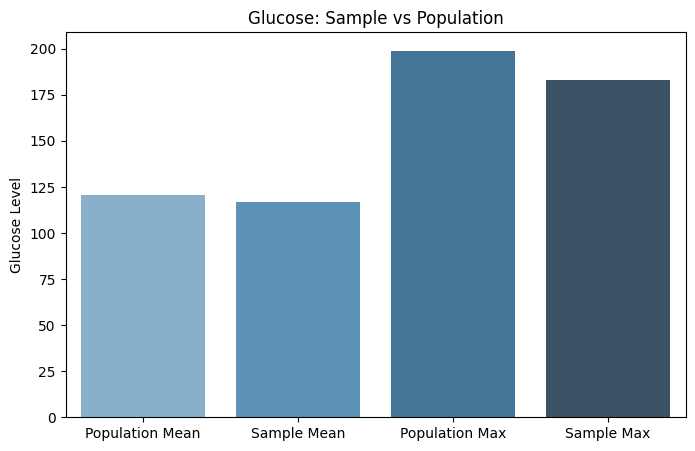

In [11]:
# Comparison chart
plt.figure(figsize=(8,5))
sns.barplot(x=['Population Mean', 'Sample Mean', 'Population Max', 'Sample Max'],
            y=[pop_mean, sample_mean, pop_max, sample_max],
            palette='Blues_d')
plt.title('Glucose: Sample vs Population')
plt.ylabel('Glucose Level')
plt.show()

#b) 98th Percentile of BMI

In [13]:
# Calculate 98th percentiles
pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample['BMI'], 98)
sample_bmi_98

np.float64(40.248)

<ipython-input-14-0e41c22e0be8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Population 98th BMI', 'Sample 98th BMI'],


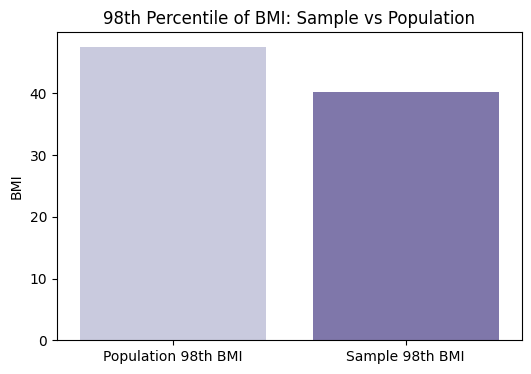

In [14]:
# Comparison chart
plt.figure(figsize=(6,4))
sns.barplot(x=['Population 98th BMI', 'Sample 98th BMI'],
            y=[pop_bmi_98, sample_bmi_98],
            palette='Purples')
plt.title('98th Percentile of BMI: Sample vs Population')
plt.ylabel('BMI')
plt.show()

#c) Bootstrap Sampling on BloodPressure

In [15]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp = boot_sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

In [16]:
# Averages across bootstrap samples
avg_mean = np.mean(bootstrap_means)
avg_mean

np.float64(69.17696)

In [17]:
avg_std = np.mean(bootstrap_stds)
avg_std

np.float64(19.08274018350705)

In [18]:
avg_percentile = np.mean(bootstrap_percentiles)
avg_percentile

np.float64(97.92404000000003)

In [19]:
# Population stats
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_mean

np.float64(69.10546875)

In [20]:
pop_bp_std = df['BloodPressure'].std()
pop_bp_std

19.355807170644777

In [21]:
pop_bp_98 = np.percentile(df['BloodPressure'], 98)
pop_bp_98

np.float64(99.31999999999994)

In [22]:
# Comparison charts
labels = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_values = [avg_mean, avg_std, avg_percentile]
population_values = [pop_bp_mean, pop_bp_std, pop_bp_98]
x = np.arange(len(labels))
width = 0.35
x

array([0, 1, 2])

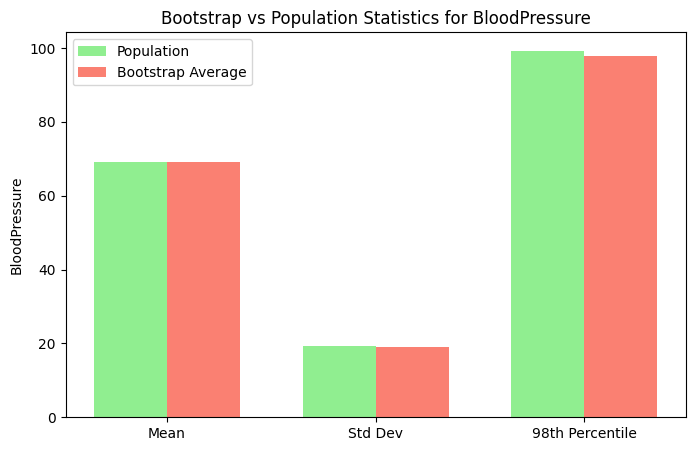

In [23]:
plt.figure(figsize=(8,5))
plt.bar(x - width/2, population_values, width, label='Population', color='lightgreen')
plt.bar(x + width/2, bootstrap_values, width, label='Bootstrap Average', color='salmon')
plt.ylabel('BloodPressure')
plt.title('Bootstrap vs Population Statistics for BloodPressure')
plt.xticks(x, labels)
plt.legend()
plt.show()